In [40]:
import pandas as pd
df= pd.read_excel("/Users/camilalopez/Library/CloudStorage/OneDrive-UniversidaddelosAndes/FINAL/ANALÍTICA/default of credit card clients.xls", header=1)

df = df.apply(pd.to_numeric, errors='coerce')

INVESTIGACIÓN DATOS

In [41]:
print(df.head())

num_variables = df.size

print("Número de variables en el DataFrame:", num_variables)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [42]:
# Calcular la cantidad de valores NaN en cada columna
valores_nulos_por_columna = df.isna().sum()

# Sumar la cantidad total de valores NaN en todo el DataFrame
total_valores_nulos = valores_nulos_por_columna.sum()

print("Total de valores NaN en el DataFrame:", total_valores_nulos)
print("\nCantidad de valores NaN por columna:")
print(valores_nulos_por_columna)

Total de valores NaN en el DataFrame: 0

Cantidad de valores NaN por columna:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [43]:
import pandas as pd

# Calcular el rango intercuartílico (IQR) para cada variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers para cada variable
outliers_por_variable = {}
for columna in df.columns:
    filtro_outliers = (df[columna] < (Q1[columna] - 1.5 * IQR[columna])) | (df[columna] > (Q3[columna] + 1.5 * IQR[columna]))
    outliers_por_variable[columna] = df[filtro_outliers]

# Contar la cantidad de outliers para cada variable
for columna, outliers in outliers_por_variable.items():
    print(f"Variable '{columna}': {outliers.shape[0]} outliers")


Variable 'ID': 0 outliers
Variable 'LIMIT_BAL': 167 outliers
Variable 'SEX': 0 outliers
Variable 'EDUCATION': 454 outliers
Variable 'MARRIAGE': 0 outliers
Variable 'AGE': 272 outliers
Variable 'PAY_0': 3130 outliers
Variable 'PAY_2': 4410 outliers
Variable 'PAY_3': 4209 outliers
Variable 'PAY_4': 3508 outliers
Variable 'PAY_5': 2968 outliers
Variable 'PAY_6': 3079 outliers
Variable 'BILL_AMT1': 2400 outliers
Variable 'BILL_AMT2': 2395 outliers
Variable 'BILL_AMT3': 2469 outliers
Variable 'BILL_AMT4': 2622 outliers
Variable 'BILL_AMT5': 2725 outliers
Variable 'BILL_AMT6': 2693 outliers
Variable 'PAY_AMT1': 2745 outliers
Variable 'PAY_AMT2': 2714 outliers
Variable 'PAY_AMT3': 2598 outliers
Variable 'PAY_AMT4': 2994 outliers
Variable 'PAY_AMT5': 2945 outliers
Variable 'PAY_AMT6': 2958 outliers
Variable 'default payment next month': 6636 outliers


In [49]:
# Iterar sobre cada columna y mostrar las estadísticas descriptivas
for columna in df.columns:
    print(f"\nEstadísticas descriptivas para la variable '{columna}':")
    print(df[columna].describe())



Estadísticas descriptivas para la variable 'ID':
count    30000.000000
mean     15000.500000
std       8660.398374
min          1.000000
25%       7500.750000
50%      15000.500000
75%      22500.250000
max      30000.000000
Name: ID, dtype: float64

Estadísticas descriptivas para la variable 'LIMIT_BAL':
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Estadísticas descriptivas para la variable 'SEX':
count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

Estadísticas descriptivas para la variable 'EDUCATION':
count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max 

In [50]:
# Crear un DataFrame con las medias y desviaciones estándar de cada variable
summary_table = pd.DataFrame({
    'Variable': df.columns,
    'Media': df.mean(),
    'Desviación Estándar': df.std()
})

# Mostrar la tabla
print(summary_table)

                                              Variable          Media  \
ID                                                  ID   15000.500000   
LIMIT_BAL                                    LIMIT_BAL  167484.322667   
SEX                                                SEX       1.603733   
EDUCATION                                    EDUCATION       1.853133   
MARRIAGE                                      MARRIAGE       1.551867   
AGE                                                AGE      35.485500   
PAY_0                                            PAY_0      -0.016700   
PAY_2                                            PAY_2      -0.133767   
PAY_3                                            PAY_3      -0.166200   
PAY_4                                            PAY_4      -0.220667   
PAY_5                                            PAY_5      -0.266200   
PAY_6                                            PAY_6      -0.291100   
BILL_AMT1                                    BILL_A

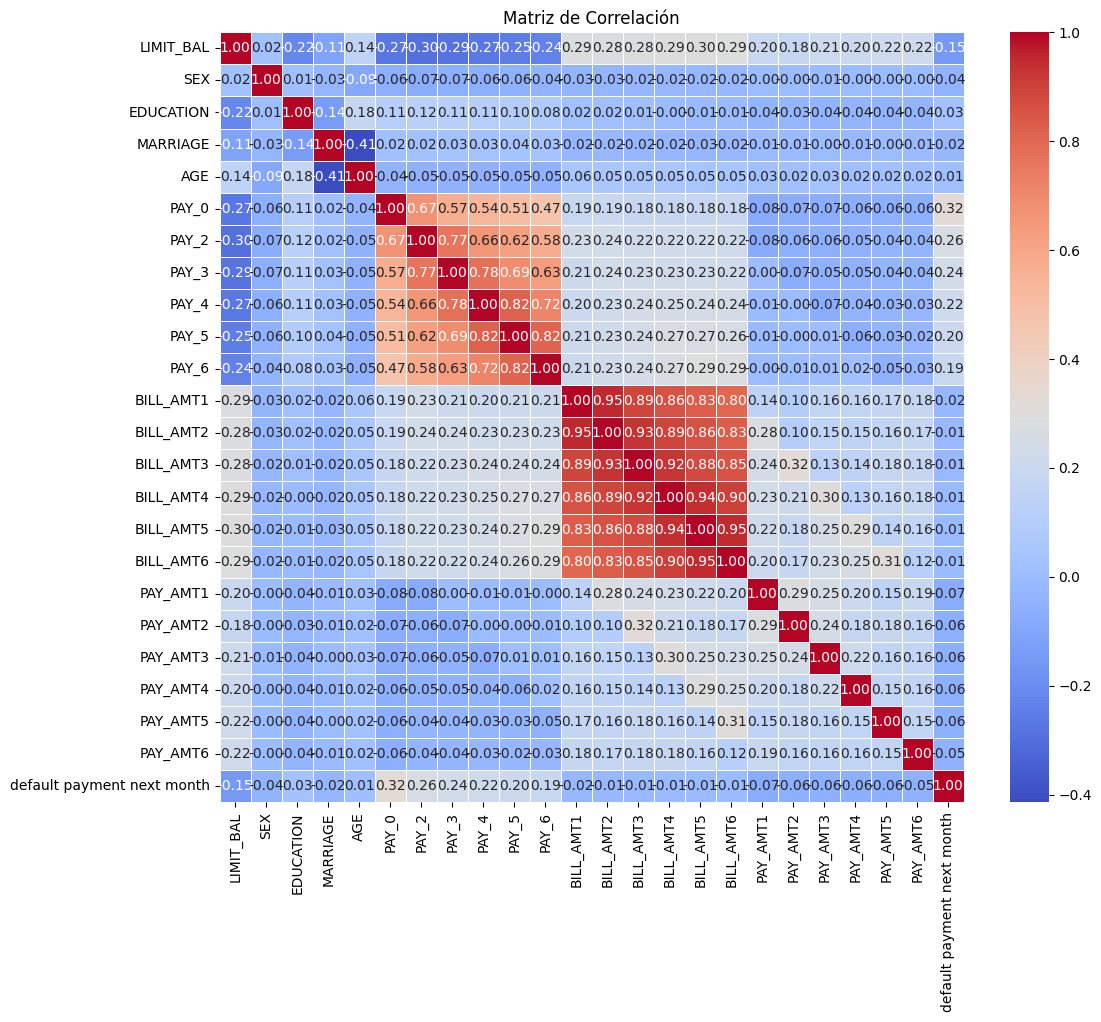

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_sin_limit_bal = df.columns[1:]

# Calcula la matriz de correlación excluyendo la primera columna
correlacion_sin_limit_bal = df[columnas_sin_limit_bal].corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlacion_sin_limit_bal, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añade un título
plt.title('Matriz de Correlación')

# Muestra el mapa de calor
plt.show()



In [54]:
import pandas as pd

# Supongamos que tus datos están en un DataFrame llamado 'data'
# Reemplaza 'data' con el nombre real de tu DataFrame si es diferente

# Selecciona todas las columnas excepto la primera ('LIMIT_BAL')
columnas_sin_limit_bal = df.columns[1:]

# Calcula la matriz de correlación excluyendo la primera columna
correlacion_sin_limit_bal = df[columnas_sin_limit_bal].corr()

# Imprime la matriz de correlación
print(correlacion_sin_limit_bal)


                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

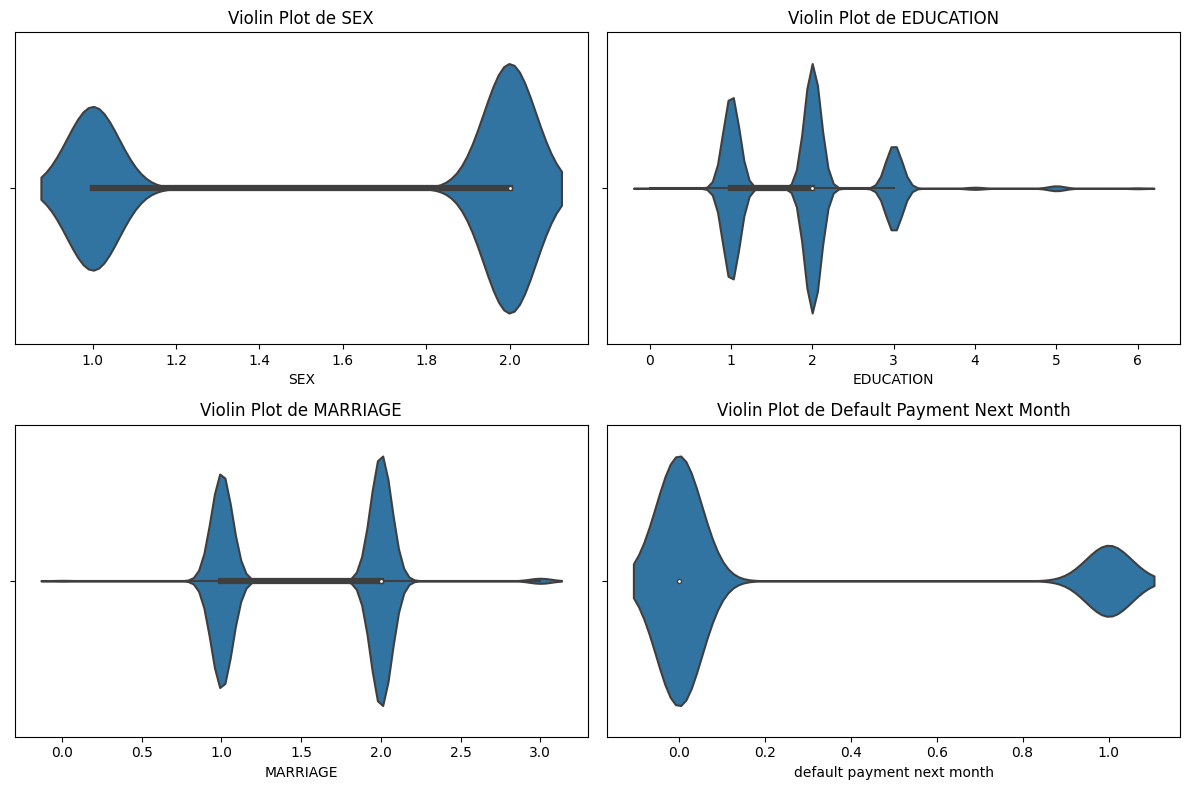

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura
plt.figure(figsize=(12, 8))

# Variable SEX
plt.subplot(2, 2, 1)
sns.violinplot(x='SEX', y=None, data=df, hue='default payment next month', split=True)
plt.title('Violin Plot de SEX')

# Variable EDUCATION
plt.subplot(2, 2, 2)
sns.violinplot(x='EDUCATION', y=None, data=df, hue='default payment next month', split=True)
plt.title('Violin Plot de EDUCATION')

# Variable MARRIAGE
plt.subplot(2, 2, 3)
sns.violinplot(x='MARRIAGE', y=None, data=df, hue='default payment next month', split=True)
plt.title('Violin Plot de MARRIAGE')

# Variable default payment next month
plt.subplot(2, 2, 4)
sns.violinplot(x='default payment next month', y=None, data=df)
plt.title('Violin Plot de Default Payment Next Month')

plt.tight_layout()
plt.show()

